# Random Edge Predictor

This idea is from the DataCamp Network course. We will look through a graph's nodes and pull out its neighbors. Once we have those neighbors we will check to see if they have edges between them. If not then there is an open triangle. We will increment dictionary containing these nodes. Once we get to the end we can select a cut off like the `top10`. 

This is more a walkthrough on how you could implement this base method, if you wanted to.

1. Load the dataset
2. Check the graph
3. Iterate through the nodes in the graph
4. Pull out neighbors for each graph.
5. Check to see if edges are present between neighbor nodes. If not then increment a tally dict.
6. Select a cutoff and return all of the pairs that are above that cutoff

In [1]:
# Load in packages
import networkx as nx
import pandas as pd
import numpy as np
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Load in the graph
G = nx.read_gpickle('github_users.p')

# Check the dimensions
len(G.nodes()), len(G.edges())

(56519, 72900)

### Let's check the graph

Lets check the attributes and also lets change the color of the real edges within the graph

In [3]:
# Lets see what attributes are attached to the nodes
list(G.nodes(data=True))[0]

('u1', {'bipartite': 'users'})

In [4]:
# Check edge attributes
list(G.edges(data=True))[0]

('u1', 'u3124', {})

In [5]:
# Make the real edges black
for edge_pair in G.edges():
    G.edges()[edge_pair]['color'] = 'black'

In [6]:
# Check the colors
list(G.edges(data=True))[0]

('u1', 'u3124', {'color': 'black'})

### Implement Random Edge Precition

It is pretty simple logic, but basically lets look to see if there are open traingles within all the nodes and their neighbors.

In [7]:
# init defaultdict
recommended = defaultdict(int)

# Iter of nodes in G github
for n, d in G.nodes(data=True):
    
    # Iterate over all possible triangle relationships combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check to see if they are have an edge
        if not G.has_edge(n1, n2):
            
            # increment their recommended
            recommended[(n1, n2)] += 1
            
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())

# Subset the recommended by the cutoff of the top10
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]

print(top10_pairs)

[('u264', 'u655'), ('u627', 'u3082'), ('u363', 'u1208'), ('u89', 'u325'), ('u741', 'u935'), ('u268', 'u741')]


### Graph

Lets pull out a small section of the graph that has one of the nodes that has a predicted edge in it. We will first plot it to see its current structure. Then we will add the new edges to the graph with a red color designation, then we will redraw the graph

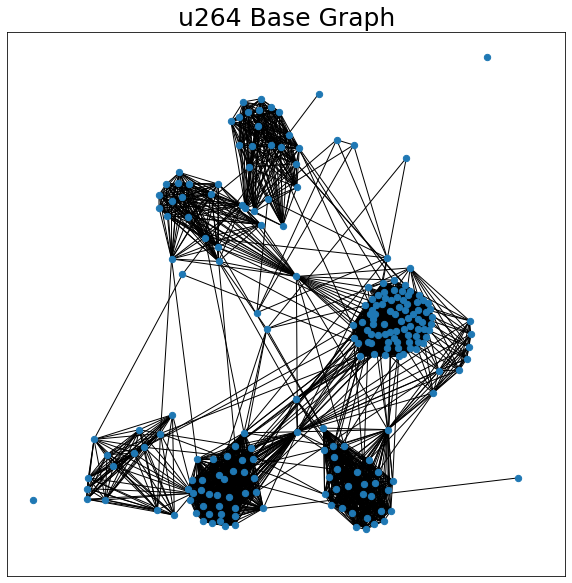

In [15]:
# Set the figsize
plt.figure(figsize=(10,10))

# Grab a subset of data 
nodelist = list()
for n in G.neighbors('u264'):
    nodelist.append(n)
        
# Pull out a subgraph
new_G = G.subgraph(nodelist).copy()

# Set the x,y coords of the nodes and edges
pos = nx.spring_layout(new_G, iterations=20, k=0.2, seed=1)

# Draw the graph
nx.draw_networkx_nodes(new_G, pos, node_size = 40)
nx.draw_networkx_edges(new_G, pos)
plt.title('u264 Base Graph', fontsize=25)
plt.show()

Lets add in the new predicted edges and make them red so they are easier to visualize in the graph

In [12]:
# List to hold the inputs
new_tuple = list()

# Lets iter through the new edges and add color attributes to them
for n1, n2 in top10_pairs:
    new_tuple.append((n1, n2, {'color': 'red'}))
    
# Add to the graph
G.add_edges_from(new_tuple)

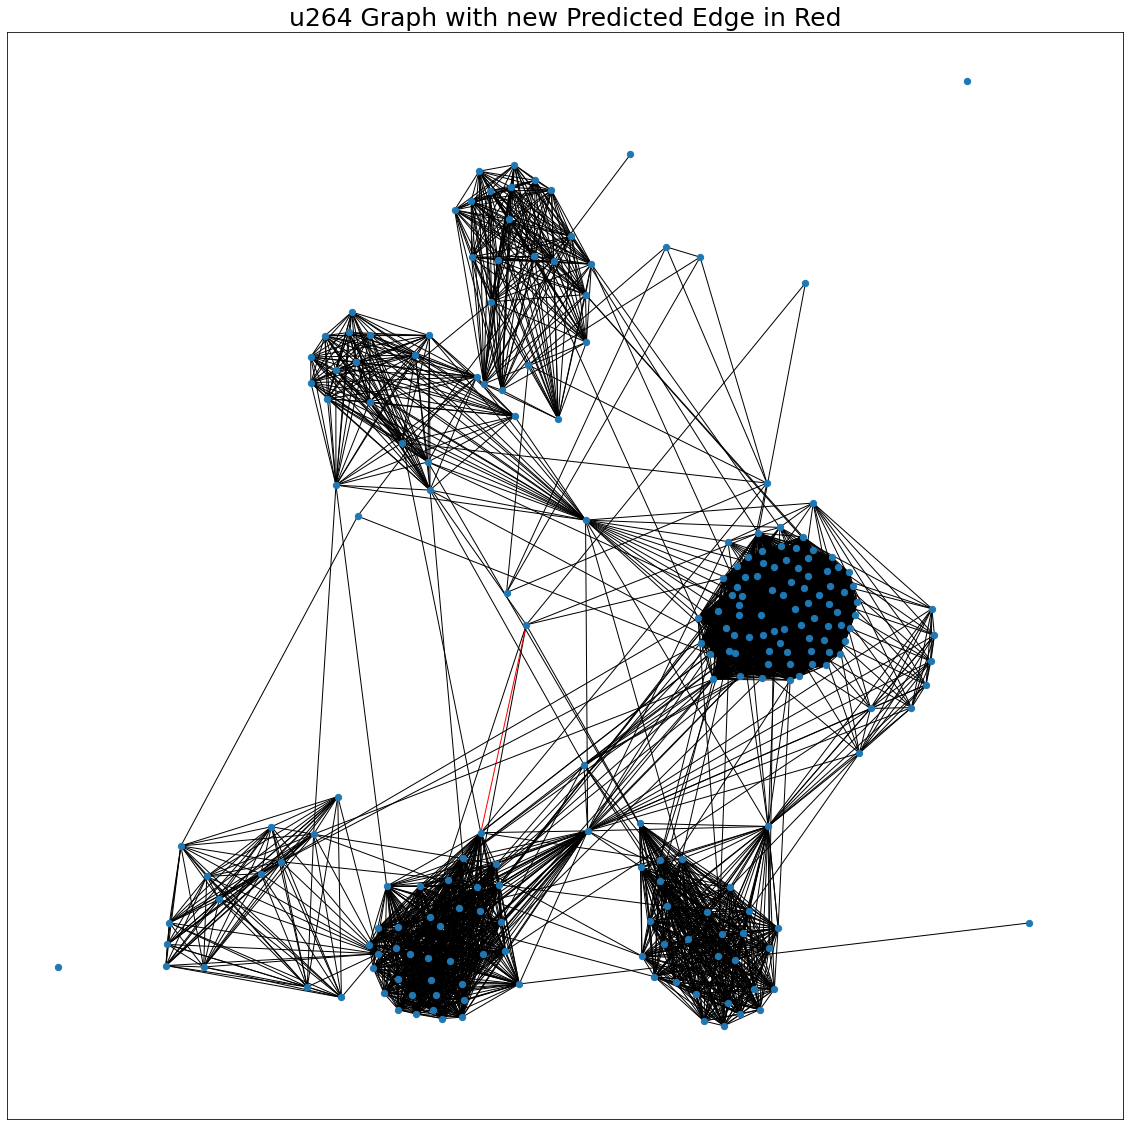

In [16]:
# Set the figure size
plt.figure(figsize=(20,20))

# Grab a subset of data container our node of interest
nodelist = list()
for n in G.neighbors('u264'):
    nodelist.append(n)

# Lets pull out the subgraph again
g = G.subgraph(nodelist).copy()

# Set the x,y coords of nodes and edges
pos = nx.spring_layout(g, iterations=20, k=0.2, seed=1)


# Draw the graph, but this time specify the edge_color attribute
nx.draw_networkx_nodes(g, pos, node_size = 40)
nx.draw_networkx_edges(g, pos, edge_color=[d['color'] for n1,n2,d in g.edges(data=True)])
plt.title('u264 Graph with new Predicted Edge in Red', fontsize=25)
plt.show()